## Preparation

### Libraries and Global Variables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

random_state = 42

### Importing dataset

In [14]:
df = pd.read_csv('/Users/jackyang/Documents/Homework/2025 Spring/ESE 417T/andrewtinajack/winequality-red-5.csv', delimiter=';')
print(df.columns)
X = df.drop(columns=['quality'])
y = df['quality']


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Exploratory Analysis

### Basic Information

In [15]:
df.shape

(1599, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### YData Profiling Report

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df)

### Histogram of the Output Score

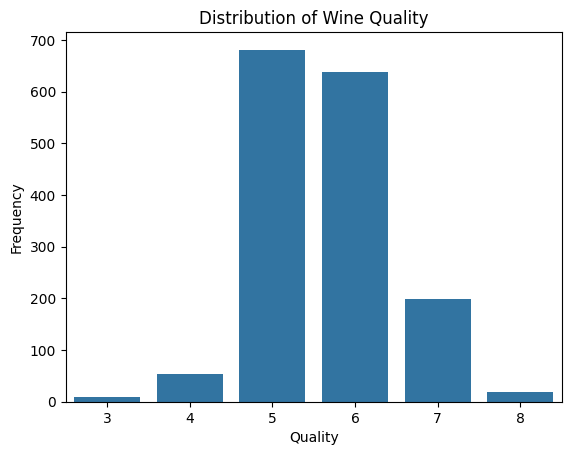

In [19]:
# Histogram of wine quality (target variable)
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

### Histogram of the All Features


<Figure size 1200x1000 with 0 Axes>

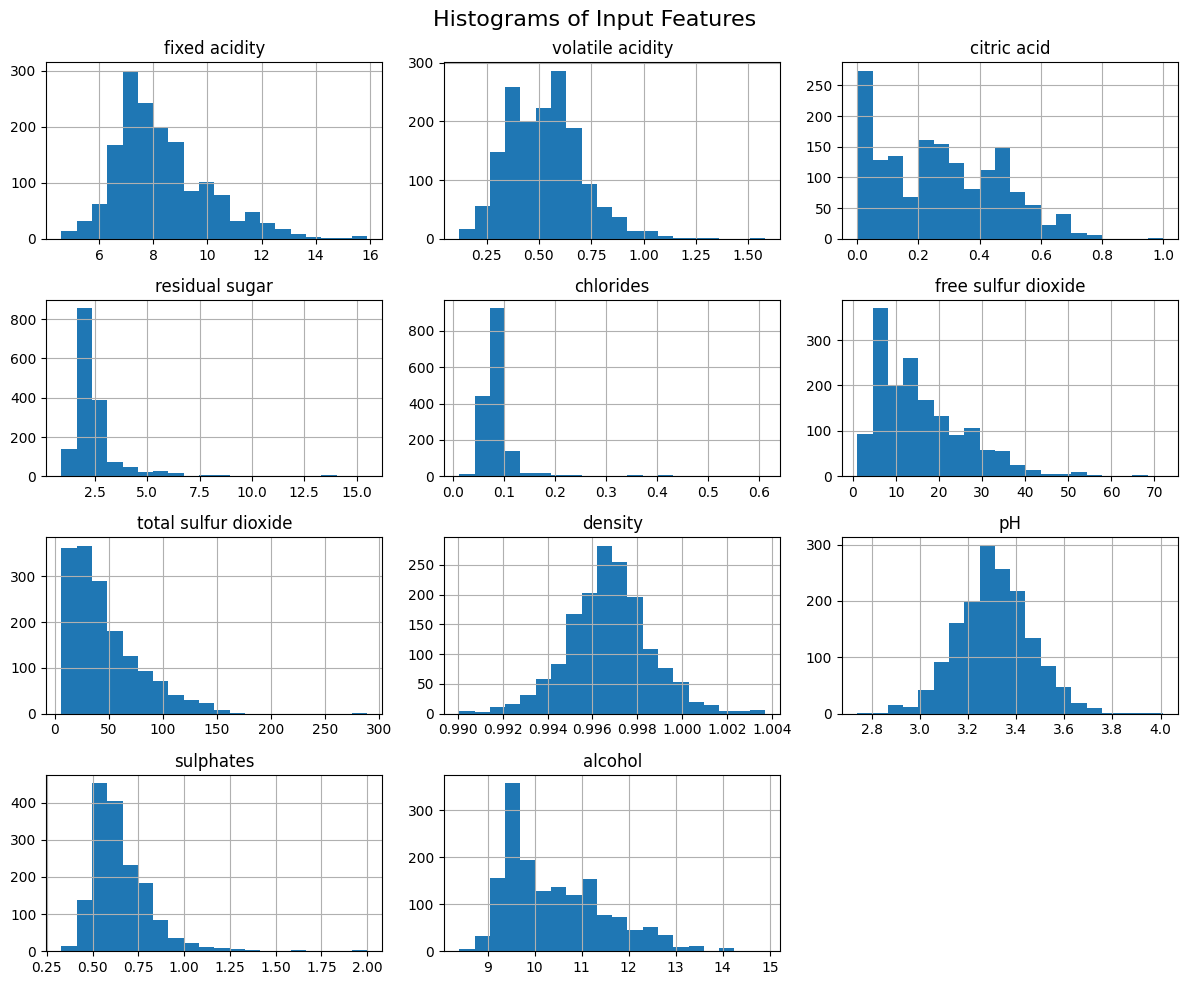

In [20]:
# Histogram of input features

plt.figure(figsize=(12, 10))

df.iloc[:, :-1].hist(bins=20, figsize=(12, 10), layout=(4, 3)) 
plt.suptitle('Histograms of Input Features', fontsize=16)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Input Features

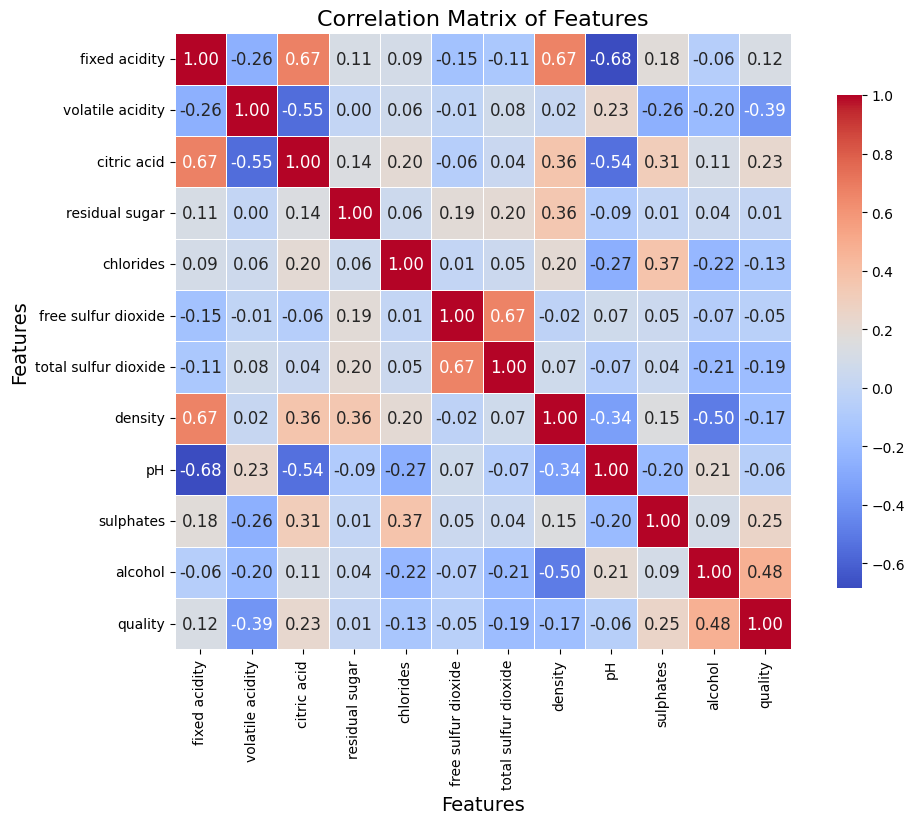

In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix, 
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 12},     
    square=True          
)

plt.title('Correlation Matrix of Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

## Data Preprocessing

### Train Test Split

We split data into training and testing sets, with 80% of the data in the training set, and 20% in the testing dataset, using random_state=42. We stratified using y because our target data is very imbalanced.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [23]:
print('Training data set size:', X_train.shape[0])
print('Testing data set size:', X_test.shape[0])

Training data set size: 1279
Testing data set size: 320


### Data Scaling

We scaled the training data using standardization for models such as ANN. This was performed after the train test split to avoid data leakage.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training and Evaluation

### Artificial Neural Network Model

#### ANN Training & Hyperparameter Tuning

In [26]:
# Raw data
from sklearn.neural_network import MLPClassifier

y_train = np.ravel(y_train)  # reshaping to avoid warning

hidden_layers = [
    (100,),            # 1 layer with 100 nodes
    (200,),            # 1 layer with 200 nodes
    (100, 50),         # 2 layers: 100 nodes, then 50 nodes
    (200, 100),        # 2 layers: 200 nodes, then 100 nodes
    (100, 50, 25)      # 3 layers: 100 -> 50 -> 25
]

# Creating a grid of hyperparameters
param_grid_ann = {
    'hidden_layer_sizes': hidden_layers,
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.005, 0.001],
    'max_iter': [1000],
    'alpha': [0.0005, 0.001, 0.01],
}

# Creating ANN model
ann_model_raw = MLPClassifier(random_state=random_state, early_stopping=True)

# Performing Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid_search_ann_raw = GridSearchCV(estimator=ann_model_raw, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_ann_raw.fit(X_train, y_train)

# Best hyperparameters
best_params_ann_raw = grid_search_ann_raw.best_params_
print("Best Hyperparameters:", best_params_ann_raw)

# Best estimator
best_ann_model_raw = grid_search_ann_raw.best_estimator_
y_pred_ann_raw = best_ann_model_raw.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_raw))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_ann_raw))

from sklearn.metrics import accuracy_score
accuracy_ann_raw = accuracy_score(y_test, y_pred_ann_raw)
print(f"Best Mean Accuracy with raw data: {grid_search_ann_raw.best_score_:.4f}")
print(f"Best Accuracy on Test Set with raw data: {accuracy_ann_raw:.4f}")


Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.005, 'max_iter': 1000}
Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 0  0  8  3  0  0]
 [ 0  0 95 41  0  0]
 [ 0  0 44 83  1  0]
 [ 0  0  6 33  1  0]
 [ 0  0  0  2  1  0]]
Best Mean Accuracy with raw data: 0.5653
Best Accuracy on Test Set with raw data: 0.5594


In [27]:
# Scaled data

# Creating ANN model
ann_model_scaled = MLPClassifier(random_state=random_state, early_stopping=True)

# Performing Grid Search to find the best hyperparameters
grid_search_ann_scaled = GridSearchCV(estimator=ann_model_scaled, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1)
grid_search_ann_scaled.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_ann_scaled = grid_search_ann_scaled.best_params_
print("Best Hyperparameters:", best_params_ann_scaled)

# Best estimator
best_ann_model_scaled = grid_search_ann_scaled.best_estimator_
y_pred_ann_scaled = best_ann_model_scaled.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_scaled))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_ann_scaled))

accuracy_ann_scaled = accuracy_score(y_test, y_pred_ann_scaled)
print(f"Best Mean Accuracy with scaled data: {grid_search_ann_scaled.best_score_:.4f}")
print(f"Best Accuracy on Test Set with scaled data: {accuracy_ann_scaled:.4f}")


Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.005, 'max_iter': 1000}
Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1 96 39  0  0]
 [ 0  3 36 84  5  0]
 [ 0  0  2 22 16  0]
 [ 0  0  0  2  1  0]]
Best Mean Accuracy with scaled data: 0.6051
Best Accuracy on Test Set with scaled data: 0.6125


In [28]:
from sklearn.decomposition import PCA

for n_component in range(5, 11):

    # PCA transformation
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Creating ANN model
    ann_model_pca = MLPClassifier(random_state=random_state, early_stopping=True)

    # Performing Grid Search to find the best hyperparameters
    grid_search_ann_pca = GridSearchCV(estimator=ann_model_pca, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1)
    grid_search_ann_pca.fit(X_train_pca, y_train)

    # Best hyperparameters
    best_params_ann_pca = grid_search_ann_pca.best_params_
    print(f"Best Hyperparameters for PCA (n_components={n_component}):", best_params_ann_pca)

    # Best estimator
    best_ann_model_pca = grid_search_ann_pca.best_estimator_
    y_pred_ann_pca = best_ann_model_pca.predict(X_test_pca)

    # Evaluation
    print(f"Confusion Matrix for PCA-transformed data (n_components={n_component}):")
    print(confusion_matrix(y_test, y_pred_ann_pca))
    # print(f"Classification Report fr PCA-transformed data (n_components={n_component}):")
    # print(classification_report(y_test, y_pred_ann_pca))

    print(f"Best Mean Accuracy with PCA (n_components={n_component}): {grid_search_ann_pca.best_score_:.4f}")
    print(f"Best Accuracy on Test Set with PCA (n_components={n_component}): {accuracy_score(y_test, y_pred_ann_pca):.4f}")


     

Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best Hyperparameters for PCA (n_components=5): {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.005, 'max_iter': 1000}
Confusion Matrix for PCA-transformed data (n_components=5):
[[ 0  0  0  2  0  0]
 [ 0  0  8  3  0  0]
 [ 0  0 89 42  5  0]
 [ 0  0 50 74  4  0]
 [ 1  0  3 30  6  0]
 [ 0  0  1  1  1  0]]
Best Mean Accuracy with PCA (n_components=5): 0.5809
Best Accuracy on Test Set with PCA (n_components=5): 0.5281
Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best Hyperparameters for PCA (n_components=6): {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.005, 'max_iter': 1000}
Confusion Matrix for PCA-transformed data (n_components=6):
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 102  33   1   0]
 [  0   0  50  77   1   0]
 [  0   0   1  34   5   0]
 [  0   0   0   2   1   0]]
Best Mean Accuracy


### K-Nearest Neighbors (KNN) Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### kNN Training

In [31]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train.ravel())
knn_pred = knn_classifier.predict(X_test)
print("K-Nearest Neighbors Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Classifier
Confusion Matrix:
 [[ 0  0  1  1  0  0]
 [ 0  0  8  3  0  0]
 [ 0  1 86 45  4  0]
 [ 0  0 55 64  9  0]
 [ 0  0 15 20  5  0]
 [ 0  0  0  1  2  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.52      0.63      0.57       136
           6       0.48      0.50      0.49       128
           7       0.25      0.12      0.17        40
           8       0.00      0.00      0.00         3

    accuracy                           0.48       320
   macro avg       0.21      0.21      0.20       320
weighted avg       0.44      0.48      0.46       320


Accuracy Score: 0.484375


#### Fine tuning for KNN

In [32]:
# Raw data

# fine tuning using Gridsearch
param_grid_knn = { 'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'p': [1, 2] }
# the 1 and 2 are different types of distance, manhattan or euclidean
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=4,
    n_jobs=-1,
    #verbose=2
)
grid_search_knn.fit(X_train, y_train.ravel())
best_knn = grid_search_knn.best_estimator_

# Best hyperparameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)
y_best_pred_knn = best_knn.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_best_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_knn, zero_division=0))

print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_knn.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, grid_search_knn.predict(X_test)):.4f}")


Best Parameters for KNN: {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Confusion Matrix: [[ 0  0  1  1  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 96 36  4  0]
 [ 0  0 37 86  5  0]
 [ 0  0  3 19 18  0]
 [ 0  0  0  2  0  1]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.71      0.69       136
           6       0.58      0.67      0.62       128
           7       0.67      0.45      0.54        40
           8       1.00      0.33      0.50         3

    accuracy                           0.63       320
   macro avg       0.49      0.36      0.39       320
weighted avg       0.61      0.63      0.61       320

Best Mean CV Accuracy with StandardScaler: 0.5903
Best Accuracy on Test Set with StandardScaler: 0.6281


In [34]:
# Scaled data

grid_search_knn_scaled = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=4,
    n_jobs=-1,
    #verbose=2
)

grid_search_knn_scaled.fit(X_train_scaled, y_train.ravel())
best_knn_scaled = grid_search_knn_scaled.best_estimator_
print(f"Best Parameters for SVM (C and kernel) with StandardScaler:", grid_search_knn_scaled.best_params_)
print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_knn_scaled.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, best_knn_scaled.predict(X_test_scaled)):.4f}")

Best Parameters for SVM (C and kernel) with StandardScaler: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Best Mean CV Accuracy with StandardScaler: 0.6481
Best Accuracy on Test Set with StandardScaler: 0.6687


In [35]:
# PCA data
from sklearn.decomposition import PCA 

for n_component in range(5, 11):
    
    # PCA transformation
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Performing Grid Search to find the best hyperparameters
    grid_search_knn_pca = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid_knn,
        cv=4,
        n_jobs=-1,
        #verbose=1
    )
    grid_search_knn_pca.fit(X_train_pca, y_train.ravel())

    # Best hyperparameters
    best_params_knn_pca = grid_search_knn_pca.best_params_
    print(f"Best Hyperparameters for PCA (n_components={n_component}):", best_params_knn_pca)

    # Best estimator
    best_knn_model_pca = grid_search_knn_pca.best_estimator_
    y_pred_knn_pca = best_knn_model_pca.predict(X_test_pca)

    # Evaluation
    print(f"Confusion Matrix for PCA-transformed data (n_components={n_component}):")
    print(confusion_matrix(y_test, y_pred_knn_pca))
    #print(f"Classification Report fr PCA-transformed data (n_components={n_component}):")
    #print(classification_report(y_test, y_pred_knn_pca, zero_division=1))

    print(f"Best Mean Accuracy with PCA (n_components={n_component}): {grid_search_knn_pca.best_score_:.4f}")
    print(f"Best Accuracy on Test Set with PCA (n_components={n_component}): {accuracy_score(y_test, y_pred_knn_pca):.4f}")

Best Hyperparameters for PCA (n_components=5): {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Confusion Matrix for PCA-transformed data (n_components=5):
[[ 0  0  1  1  0  0]
 [ 0  0  6  5  0  0]
 [ 0  0 94 39  3  0]
 [ 0  0 34 88  6  0]
 [ 0  0  5 20 15  0]
 [ 0  0  0  2  0  1]]
Best Mean Accuracy with PCA (n_components=5): 0.5848
Best Accuracy on Test Set with PCA (n_components=5): 0.6188
Best Hyperparameters for PCA (n_components=6): {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Confusion Matrix for PCA-transformed data (n_components=6):
[[ 0  0  1  1  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 93 39  4  0]
 [ 0  0 35 85  8  0]
 [ 0  0  5 20 15  0]
 [ 0  0  0  2  0  1]]
Best Mean Accuracy with PCA (n_components=6): 0.5926
Best Accuracy on Test Set with PCA (n_components=6): 0.6062
Best Hyperparameters for PCA (n_components=7): {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Confusion Matrix for PCA-transformed data (n_components=7):
[[ 0  0  1  1  0  0]
 [ 0  0  7  4  0  0]
 [ 0

### Support Vector Machine

Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}
Confusion Matrix: [[  0   0   1   1   0   0]
 [  0   0  10   1   0   0]
 [  0   0 105  31   0   0]
 [  0   0  50  78   0   0]
 [  0   0   2  38   0   0]
 [  0   0   0   3   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.77      0.69       136
           6       0.51      0.61      0.56       128
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.19      0.23      0.21       320
weighted avg       0.47      0.57      0.52       320


Accuracy Score: 0.571875
Best Mean CV Accuracy: 0.5887


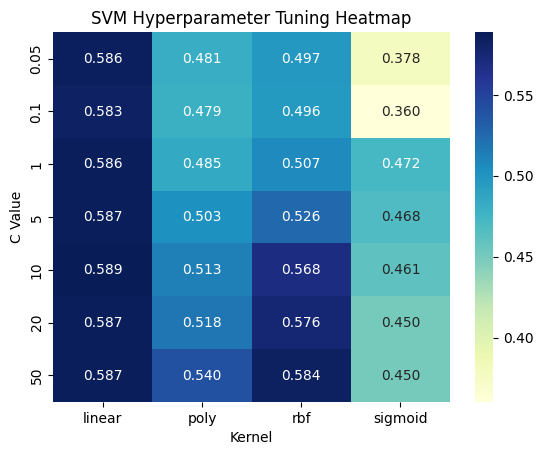

In [38]:
# SVM raw data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SVM Classifier
param_grid_svm = {
    'C': [0.05, 0.1, 1, 5, 10, 20, 50],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=4,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True,
    verbose=1,
)

grid_search_svm.fit(X_train, y_train.ravel())
best_svm = grid_search_svm.best_estimator_

# Best hyperparameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)
y_best_pred_svm = best_svm.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_best_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_svm, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_best_pred_svm))
print(f"Best Mean CV Accuracy: {grid_search_svm.best_score_:.4f}")

heatmap = sns.heatmap(
    grid_search_svm.cv_results_['mean_test_score'].reshape(len(param_grid_svm['C']), len(param_grid_svm['kernel'])),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    xticklabels=param_grid_svm['kernel'],
    yticklabels=param_grid_svm['C']
)
plt.title("SVM Hyperparameter Tuning Heatmap")
plt.xlabel("Kernel")
plt.ylabel("C Value")
plt.show()

In [42]:
# PCA data

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# The SVM model runs somewhat slow, so we will run each component separately
for n_component in range(5, 11):
    # PCA transformation
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Performing Grid Search to find the best hyperparameters
    grid_search_svm = GridSearchCV(
        estimator=SVC(),
        param_grid=param_grid_svm,
        cv=4,
        n_jobs=-1,
        scoring='accuracy',
        return_train_score=True,
        verbose=1,
    )

    grid_search_svm.fit(X_train_pca, y_train.ravel())

    best_svm = grid_search_svm.best_estimator_
    best_params = grid_search_svm.best_params_

    # Best hyperparameters
    print(f"Best Parameters for SVM (C and kernel) with PCA (n_components={n_component}):", best_params)
    print(f"Best Mean CV Accuracy with PCA (n_components={n_component}): {grid_search_svm.best_score_:.4f}")
    print(f"Best Accuracy on Test Set with PCA (n_components={n_component}): {accuracy_score(y_test, best_svm.predict(X_test_pca)):.4f}")

Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best Parameters for SVM (C and kernel) with PCA (n_components=5): {'C': 0.05, 'kernel': 'linear'}
Best Mean CV Accuracy with PCA (n_components=5): 0.5848
Best Accuracy on Test Set with PCA (n_components=5): 0.5406
Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best Parameters for SVM (C and kernel) with PCA (n_components=6): {'C': 50, 'kernel': 'linear'}
Best Mean CV Accuracy with PCA (n_components=6): 0.5832
Best Accuracy on Test Set with PCA (n_components=6): 0.5594
Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best Parameters for SVM (C and kernel) with PCA (n_components=7): {'C': 0.05, 'kernel': 'linear'}
Best Mean CV Accuracy with PCA (n_components=7): 0.5832
Best Accuracy on Test Set with PCA (n_components=7): 0.5594
Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best Parameters for SVM (C and kernel) with PCA (n_components=8): {'C': 0.05, 'kernel': 'linear'}
Best Mean CV A

In [ ]:
# Scaled data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=4,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True,
    verbose=1,
)

grid_search_svm.fit(X_train_scaled, y_train.ravel())
best_svm = grid_search_svm.best_estimator_
best_params = grid_search_svm.best_params_

print(f"Best Parameters for SVM (C and kernel) with StandardScaler:", best_params)
print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_svm.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, best_svm.predict(X_test_scaled)):.4f}")

Fitting 4 folds for each of 28 candidates, totalling 112 fits
[CV] END ..............................C=0.05, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.05, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.05, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.05, kernel=linear; total time=   0.0s
[CV] END ................................C=0.05, kernel=poly; total time=   0.0s
[CV] END ................................C=0.05, kernel=poly; total time=   0.0s
[CV] END ................................C=0.05, kernel=poly; total time=   0.0s
[CV] END ................................C=0.05, kernel=poly; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=0.05, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .............................C=0.05, k

### Scores

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


classes = sorted(y_train.iloc[:, 0].unique())
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'KNN': OneVsRestClassifier(KNeighborsClassifier(n_neighbors=13, weights='distance', p=1)),
    'SVM': OneVsRestClassifier(SVC(C=50, kernel='rbf', gamma=1, probability=True)),
    'ANN': OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
}

colors = cycle(['darkorange', 'blue', 'green'])
plt.figure(figsize=(10, 8))

for (name, model), color in zip(models.items(), colors):
    model.fit(X_train_scaled, label_binarize(y_train.iloc[:, 0], classes=classes))
    y_score = model.predict_proba(X_test_scaled)

  
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (AUC = {roc_auc["micro"]:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve for Multiclass Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()